In [2]:
%matplotlib inline

import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import rosbag
import argparse
from cv_bridge import CvBridge, CvBridgeError

In [43]:
def get_data(path):
    bridge = CvBridge()
    bag = rosbag.Bag(path)
    topics = [
        '/zed/rgb/image_rect_color',
        '/control_drive_parameters'
    ]

    angle = 0.0
    count = 0

    images = []
    labels = []

    for topic, message, timestamp in bag.read_messages(topics=topics):
        print('{}: [{}]: {}'.format(timestamp, topic, ''))
    
        if topic == '/zed/rgb/image_rect_color':
            count += 1
            
            try:
                image = bridge.imgmsg_to_cv2(message)

                # crop and resize
                image = image[188:, 0:672, 0:3]
                image = cv2.resize(image, (320, 160))
                
                image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
                
                # convert to grayscale
#                 weights = [1, 0, 0] # BGR (standard luminescence: [0.114, 0.587, 0.299])
#                 weights = np.array([weights]).reshape((1,3))
#                 image = cv2.transform(image, weights)

                print('[{}] message=({}, {}), shape=({})'.format(count, message.height, message.width, image.shape))

                images.append(image)
                labels.append(angle)
            except CvBridgeError as e:
                print(e)

        elif topic == '/control_drive_parameters':
            angle = message.angle
            
        if count==300:
            break


    bag.close()

    return np.array(images), np.array(labels)

In [44]:
images, labels = get_data("/home/vufuturetech/utilities/zed/data/2019-01-30-18-02-11.bag")

1548892932127249304: [/zed/rgb/image_rect_color]: 
[1] message=(720, 1280), shape=((160, 320, 3))
1548892932156771677: [/zed/rgb/image_rect_color]: 
[2] message=(720, 1280), shape=((160, 320, 3))
1548892932170538307: [/zed/rgb/image_rect_color]: 
[3] message=(720, 1280), shape=((160, 320, 3))
1548892932205802532: [/zed/rgb/image_rect_color]: 
[4] message=(720, 1280), shape=((160, 320, 3))
1548892932215586099: [/zed/rgb/image_rect_color]: 
[5] message=(720, 1280), shape=((160, 320, 3))
1548892932224757762: [/zed/rgb/image_rect_color]: 
[6] message=(720, 1280), shape=((160, 320, 3))
1548892932236184798: [/zed/rgb/image_rect_color]: 
[7] message=(720, 1280), shape=((160, 320, 3))
1548892932249765932: [/zed/rgb/image_rect_color]: 
[8] message=(720, 1280), shape=((160, 320, 3))
1548892932268109449: [/zed/rgb/image_rect_color]: 
[9] message=(720, 1280), shape=((160, 320, 3))
1548892932280635629: [/zed/rgb/image_rect_color]: 
[10] message=(720, 1280), shape=((160, 320, 3))
1548892932295235432

1548892933461791479: [/zed/rgb/image_rect_color]: 
[75] message=(720, 1280), shape=((160, 320, 3))
1548892933482590061: [/zed/rgb/image_rect_color]: 
[76] message=(720, 1280), shape=((160, 320, 3))
1548892933489368764: [/zed/rgb/image_rect_color]: 
[77] message=(720, 1280), shape=((160, 320, 3))
1548892933489448120: [/control_drive_parameters]: 
1548892933489461464: [/control_drive_parameters]: 
1548892933503390883: [/control_drive_parameters]: 
1548892933503408962: [/control_drive_parameters]: 
1548892933503490078: [/control_drive_parameters]: 
1548892933508048188: [/zed/rgb/image_rect_color]: 
[78] message=(720, 1280), shape=((160, 320, 3))
1548892933521450849: [/zed/rgb/image_rect_color]: 
[79] message=(720, 1280), shape=((160, 320, 3))
1548892933535305777: [/control_drive_parameters]: 
1548892933535326800: [/control_drive_parameters]: 
1548892933537807636: [/zed/rgb/image_rect_color]: 
[80] message=(720, 1280), shape=((160, 320, 3))
1548892933547537009: [/control_drive_parameters]:

1548892934657092915: [/zed/rgb/image_rect_color]: 
[138] message=(720, 1280), shape=((160, 320, 3))
1548892934668170744: [/control_drive_parameters]: 
1548892934673475830: [/zed/rgb/image_rect_color]: 
[139] message=(720, 1280), shape=((160, 320, 3))
1548892934709238250: [/control_drive_parameters]: 
1548892934718835255: [/control_drive_parameters]: 
1548892934722023164: [/zed/rgb/image_rect_color]: 
[140] message=(720, 1280), shape=((160, 320, 3))
1548892934740469818: [/zed/rgb/image_rect_color]: 
[141] message=(720, 1280), shape=((160, 320, 3))
1548892934759304582: [/zed/rgb/image_rect_color]: 
[142] message=(720, 1280), shape=((160, 320, 3))
1548892934772466341: [/zed/rgb/image_rect_color]: 
[143] message=(720, 1280), shape=((160, 320, 3))
1548892934786410367: [/zed/rgb/image_rect_color]: 
[144] message=(720, 1280), shape=((160, 320, 3))
1548892934787298996: [/control_drive_parameters]: 
1548892934787321107: [/control_drive_parameters]: 
1548892934787376336: [/control_drive_paramete

1548892935915417386: [/zed/rgb/image_rect_color]: 
[206] message=(720, 1280), shape=((160, 320, 3))
1548892935932844301: [/zed/rgb/image_rect_color]: 
[207] message=(720, 1280), shape=((160, 320, 3))
1548892935958930739: [/zed/rgb/image_rect_color]: 
[208] message=(720, 1280), shape=((160, 320, 3))
1548892935991784727: [/zed/rgb/image_rect_color]: 
[209] message=(720, 1280), shape=((160, 320, 3))
1548892936006586333: [/zed/rgb/image_rect_color]: 
[210] message=(720, 1280), shape=((160, 320, 3))
1548892936022967458: [/zed/rgb/image_rect_color]: 
[211] message=(720, 1280), shape=((160, 320, 3))
1548892936038331927: [/zed/rgb/image_rect_color]: 
[212] message=(720, 1280), shape=((160, 320, 3))
1548892936047537866: [/control_drive_parameters]: 
1548892936057314883: [/zed/rgb/image_rect_color]: 
[213] message=(720, 1280), shape=((160, 320, 3))
1548892936076930065: [/zed/rgb/image_rect_color]: 
[214] message=(720, 1280), shape=((160, 320, 3))
1548892936085655419: [/control_drive_parameters]:

[274] message=(720, 1280), shape=((160, 320, 3))
1548892937256167410: [/control_drive_parameters]: 
1548892937261185741: [/control_drive_parameters]: 
1548892937262321529: [/control_drive_parameters]: 
1548892937305087678: [/zed/rgb/image_rect_color]: 
[275] message=(720, 1280), shape=((160, 320, 3))
1548892937326816640: [/zed/rgb/image_rect_color]: 
[276] message=(720, 1280), shape=((160, 320, 3))
1548892937340578925: [/zed/rgb/image_rect_color]: 
[277] message=(720, 1280), shape=((160, 320, 3))
1548892937359032293: [/zed/rgb/image_rect_color]: 
[278] message=(720, 1280), shape=((160, 320, 3))
1548892937365894444: [/control_drive_parameters]: 
1548892937378047811: [/zed/rgb/image_rect_color]: 
[279] message=(720, 1280), shape=((160, 320, 3))
1548892937388243346: [/zed/rgb/image_rect_color]: 
[280] message=(720, 1280), shape=((160, 320, 3))
1548892937407330093: [/zed/rgb/image_rect_color]: 
[281] message=(720, 1280), shape=((160, 320, 3))
1548892937426190290: [/zed/rgb/image_rect_color

In [45]:
labels = np.array(labels)
labels

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14., 19., 26., 31.,
       31., 34., 37., 44., 53., 56., 56., 58., 59., 59., 59., 59., 61.,
       61., 64., 67., 71., 73., 75., 76., 77., 78., 78., 79., 79., 79.,
       79., 79., 79., 79., 79., 79., 79., 80., 80., 82., 82., 82., 82.,
       82., 82., 82., 82., 82., 82., 82., 82., 82., 82., 82., 82., 82.,
       82., 82., 82., 83., 83., 83., 84., 84., 84., 84., 84., 84., 84.,
       84., 84., 84., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85

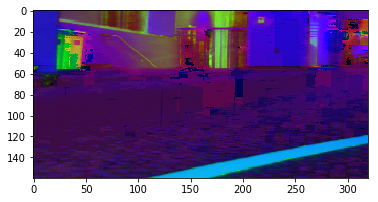

In [29]:
plt.imshow(images[-1])

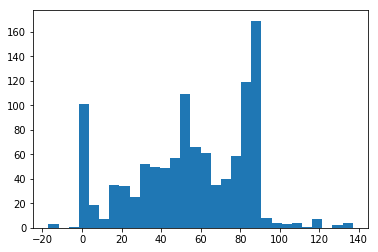

In [6]:
plt.hist(labels,bins=30);

In [52]:
def reverse(image, label, offset = 20):
    """offset: correct for positioning of left vs right cameras
        ex: a flip from left camera should be reduced in angle? """
    return [cv2.flip(image, flipCode=1)], [-label + -offset]

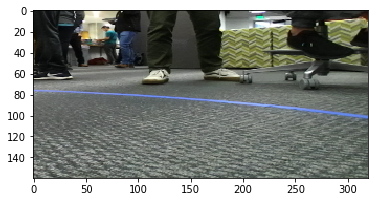

In [8]:
plt.imshow(cv2.cvtColor(reverse(images[-1], 100)[0], cv2.COLOR_BGR2RGB))

In [31]:
def randomShadow(image, label, gen_rate = 1):
    """gen-rate: specify how many new images to gen from source image"""
    # currently null
    return [image], [label]

In [30]:
def randomBrightness(image, label, gen_rate = 1, intensity_range = (4,8)):
    """intensity_range: range from 0-10 of how bright gen image should be
        ASSUME IMAGE IS IN HSV"""
    minI, maxI = [x*255/10 for x in intensity_range]
    copy = [image]*gen_rate
    nb = np.random.uniform(minI, maxI, gen_rate)
    for c in range(len(copy)):
        copy[c][:,:,2] = nb[c]
    return copy, [label]*gen_rate
    

In [33]:
def angleNoise(image, label, gen_rate = 2, sigma = 5):
    """apply random noise to label, return new image,label pairs with new image"""
    return [image]*gen_rate, [label+int(x) for x in np.random.normal(0, sigma, gen_rate)]

In [56]:
# out: new images and labels
# future concerns: sequential loading, in-place processing to avoid memory load
def process(args, images, labels):
    new_imgs, new_labels = [],[]
    targetFuncs = [reverse, randomShadow, randomBrightness, angleNoise] #important part
    for i in range(len(images)):
        new_imgs.append(images[i]); new_labels.append(labels[i])
        for f in targetFuncs: 
            n_imgs, n_labels = f(images[i], labels[i])
            new_imgs += n_imgs 
            new_labels += n_labels
    
    
    return new_imgs, new_labels
        

In [57]:
newimages, newlabels = process(None, images, labels)

In [58]:
len(newimages)

1800

(array([ 61.,   1.,   2.,   3.,   2.,   1.,   9.,   3.,  18., 200.]),
 array([ 0. ,  8.9, 17.8, 26.7, 35.6, 44.5, 53.4, 62.3, 71.2, 80.1, 89. ]),
 <a list of 10 Patch objects>)

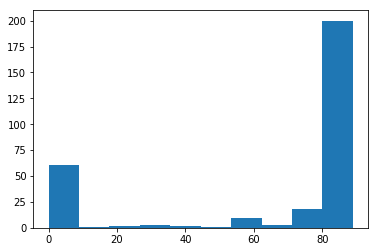

In [59]:
plt.hist(labels)

(array([219.,  12.,   6.,   3.,  94., 280.,  26.,  55., 371., 734.]),
 array([-109. ,  -87.5,  -66. ,  -44.5,  -23. ,   -1.5,   20. ,   41.5,
          63. ,   84.5,  106. ]),
 <a list of 10 Patch objects>)

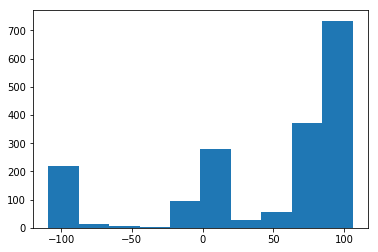

In [60]:
plt.hist(newlabels)

In [ ]:
def main():
    parser = argparse.ArgumentParser(description='[image preprocessing]  choose bag')
    parser.add_argument("path", type=str, help="path to bag")
    args = parser.parse_args()

    data, labels = get_data(args.path)


if __name__ == '__main__':
    main()